**Market Basket Analysis** is a data-driven technique used in retail and e-commerce to uncover patterns of co-occurring items in transactions. It aims to identify relationships between products that are frequently purchased together, providing valuable insights for product placement, cross-selling, and marketing strategies.

------
The dataset provided contains transactional data, with columns
representing:



- BillNo: A unique identifier for each customer’s bill.
- Itemname: The name of the purchased item.
- Quantity: The quantity of the item purchased.
- Price: The price of each item.
- CustomerID: A unique identifier for each customer.

Perform a Market Basket Analysis on the given dataset to discover associations between purchased items. Specifically, the goal is to identify:

- Which items are frequently purchased together by customers.
- The strength of these associations (e.g., support, confidence, lift).

In [1]:
import pandas as pd
# import plotly.express as px
# import plotly.io as pio
# import plotly.graph_objects as go
# pio.templates.default = "plotly_white"
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("market_basket_dataset.csv")
print(data.head())

   BillNo  Itemname  Quantity  Price  CustomerID
0    1000    Apples         5   8.30       52299
1    1000    Butter         4   6.06       11752
2    1000      Eggs         4   2.66       16415
3    1000  Potatoes         4   8.10       22889
4    1004   Oranges         2   7.26       52255


In [3]:
# look if the data has any null values or not before moving forward:

print(data.isnull().sum())

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64


In [4]:
#the summary statistics of this dataset:

print(data.describe())

            BillNo    Quantity       Price    CustomerID
count   500.000000  500.000000  500.000000    500.000000
mean   1247.442000    2.978000    5.617660  54229.800000
std     144.483097    1.426038    2.572919  25672.122585
min    1000.000000    1.000000    1.040000  10504.000000
25%    1120.000000    2.000000    3.570000  32823.500000
50%    1246.500000    3.000000    5.430000  53506.500000
75%    1370.000000    4.000000    7.920000  76644.250000
max    1497.000000    5.000000    9.940000  99162.000000


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      500 non-null    int64  
 1   Itemname    500 non-null    object 
 2   Quantity    500 non-null    int64  
 3   Price       500 non-null    float64
 4   CustomerID  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB
None


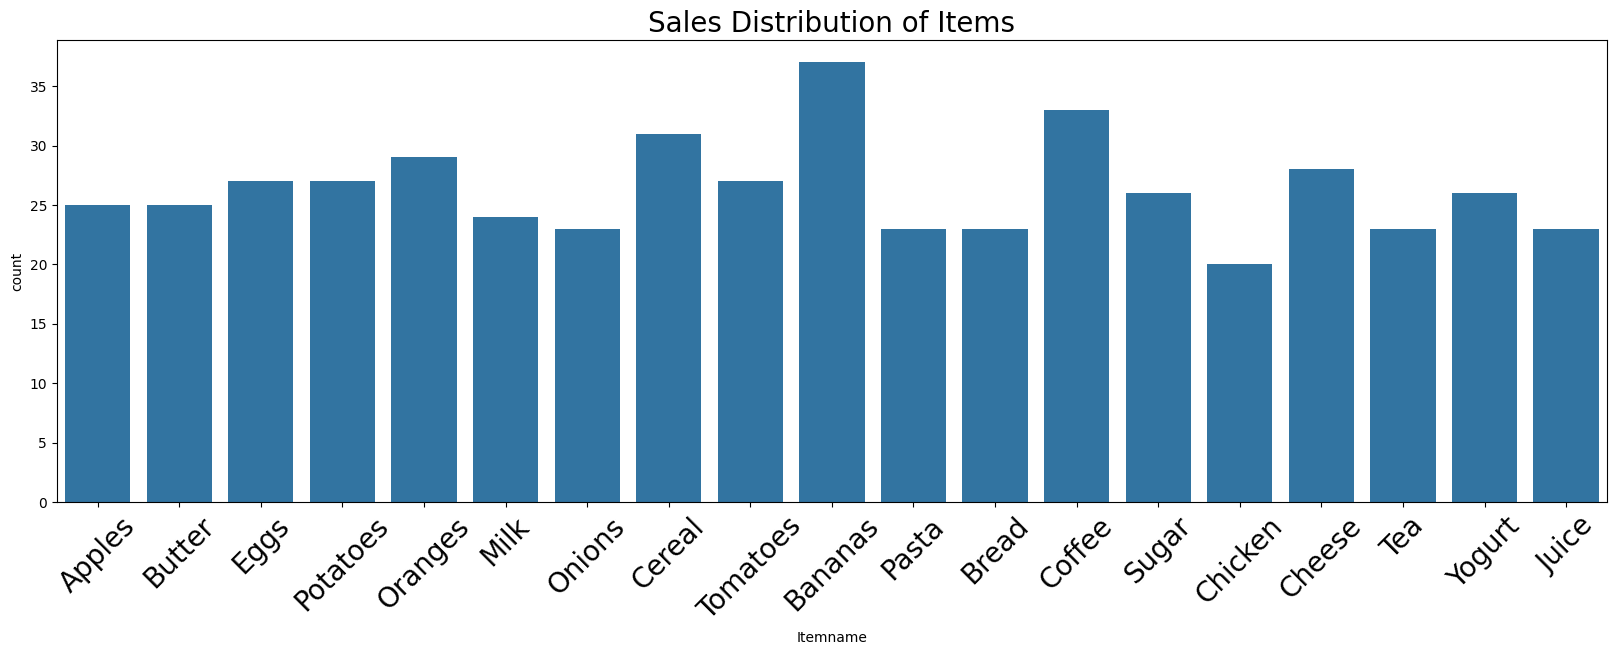

In [6]:
# the sales distribution of items
plt.figure(figsize=(20, 6))
sns.countplot(data = data , x = 'Itemname')
plt.xticks(fontsize  = 20,rotation = 45)
plt.title('Sales Distribution of Items',fontsize = 20)
plt.show()

## Top 10 Most popular items sold by the store:

In [7]:
item_pop = data.groupby('Itemname').agg({'Quantity':'sum'}).reset_index().sort_values('Quantity',ascending = False).head(10)
item_pop

,Itemname,Quantity
1,Bananas,119
5,Cheese,99
7,Coffee,88
4,Cereal,87
10,Milk,86
12,Oranges,81
15,Sugar,79
17,Tomatoes,79
14,Potatoes,78
2,Bread,76


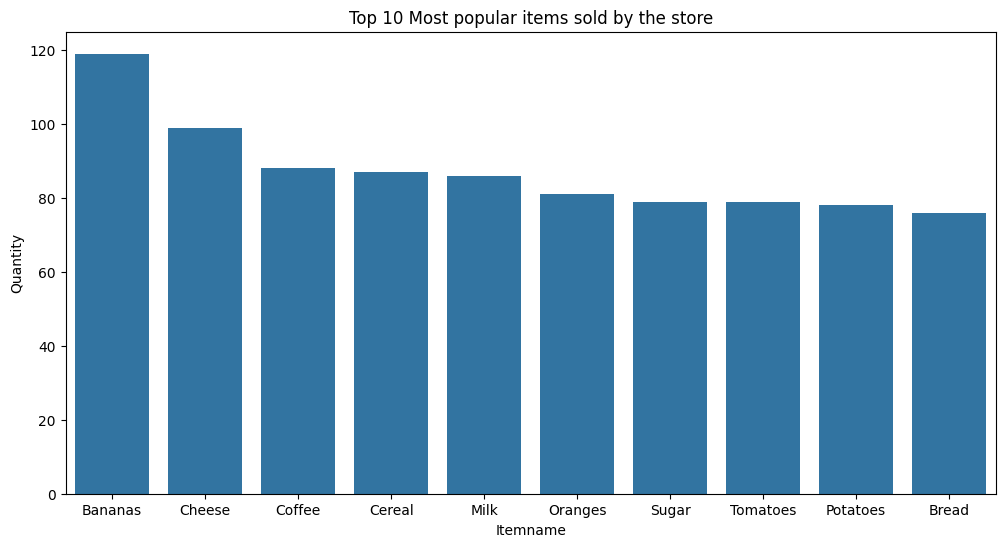

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(data = item_pop , x = 'Itemname' , y = 'Quantity')
plt.title('Top 10 Most popular items sold by the store')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

**Bananas are the most popular items sold at the store**

##  Customer behaviour:

In [9]:
cust_behaviour = data.groupby('CustomerID').agg({'Quantity':'mean', 'Price':'sum'}).reset_index()
cust_behaviour.rename(columns = {'Quantity':'Average Quantity','Price': 'Total Spending'},inplace = True)
cust_behaviour.head()

,CustomerID,Average Quantity,Total Spending
0,10504,1.0,2.04
1,10588,5.0,5.50
2,10826,1.0,5.67
3,11113,3.0,8.84
4,11267,1.0,8.87


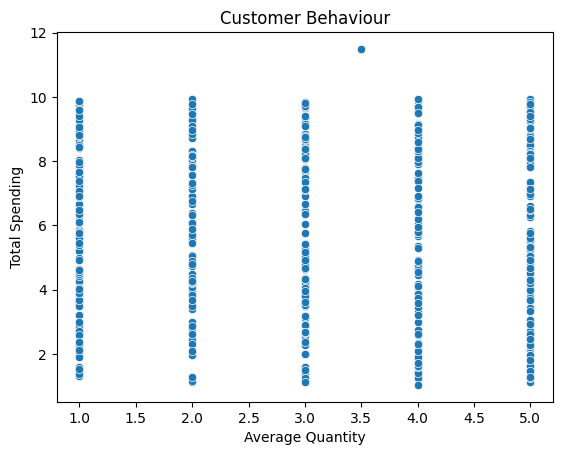

In [10]:
sns.scatterplot(data = cust_behaviour , x = 'Average Quantity' , y = 'Total Spending')
plt.title('Customer Behaviour')
plt.show()

## The Apriori algorithm:
Using the Apriori algorithm to create association rules.
- The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data.
- It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing.
- Here’s how we can implement Apriori to generate association rules:

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group items by BillNo and create a list of items for each bill
basket = data.groupby('BillNo')['Itemname'].apply(list).reset_index()
basket.head()

,BillNo,Itemname
0,1000,"[Apples, Butter, Eggs, Potatoes]"
1,1004,[Oranges]
2,1005,"[Milk, Onions, Cereal]"
3,1008,"[Tomatoes, Potatoes, Cereal]"
4,1011,[Bananas]


In [22]:
# Encode items as binary variables using one-hot encoding
basket_encoded = basket['Itemname'].str.join('|').str.get_dummies('|')
basket_encoded.head()

,Apples,Bananas,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Eggs,Juice,Milk,Onions,Oranges,Pasta,Potatoes,Sugar,Tea,Tomatoes,Yogurt
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Find frequent itemsets using Apriori algorithm with lower support
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.163399,(Apples)
1,0.241830,(Bananas)
2,0.150327,(Bread)
3,0.163399,(Butter)
4,0.202614,(Cereal)


In [25]:
# Generate association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Apples),(Bread),0.163399,0.150327,0.045752,0.280000,1.862609,1.0,0.021188,1.180102,0.553571,0.170732,0.152615,0.292174
1,(Bread),(Apples),0.150327,0.163399,0.045752,0.304348,1.862609,1.0,0.021188,1.202614,0.545055,0.170732,0.168478,0.292174
2,(Butter),(Apples),0.163399,0.163399,0.026144,0.160000,0.979200,1.0,-0.000555,0.995954,-0.024762,0.086957,-0.004062,0.160000
3,(Apples),(Butter),0.163399,0.163399,0.026144,0.160000,0.979200,1.0,-0.000555,0.995954,-0.024762,0.086957,-0.004062,0.160000
4,(Cereal),(Apples),0.202614,0.163399,0.019608,0.096774,0.592258,1.0,-0.013499,0.926237,-0.463343,0.056604,-0.079637,0.108387


In [26]:
# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

  antecedents consequents   support  confidence      lift
0    (Apples)     (Bread)  0.045752    0.280000  1.862609
1     (Bread)    (Apples)  0.045752    0.304348  1.862609
2    (Butter)    (Apples)  0.026144    0.160000  0.979200
3    (Apples)    (Butter)  0.026144    0.160000  0.979200
4    (Cereal)    (Apples)  0.019608    0.096774  0.592258
5    (Apples)    (Cereal)  0.019608    0.120000  0.592258
6    (Cheese)    (Apples)  0.039216    0.214286  1.311429
7    (Apples)    (Cheese)  0.039216    0.240000  1.311429
8   (Chicken)    (Apples)  0.032680    0.250000  1.530000
9    (Apples)   (Chicken)  0.032680    0.200000  1.530000


The above output shows association rules between different items (antecedents) and the items that tend to be purchased together with them (consequents).

# **Summary**:

- **Antecedents**: These are the items that are considered as the starting point or “if” part of the association rule. *For example, Bread, Butter, Cereal, Cheese, and Chicken are the antecedents in this analysis*.
- **Consequents**: These are the items that tend to be purchased along with the antecedents or *the “then” part of the association rule*.
- **Support**: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. *For example, the first rule indicates that Bread and Apples are bought together in approximately 4.58% of all transactions.*
- **Confidence**: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 30.43% chance of buying Apples when Bread is already in the basket.
- **Lift**: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 1.86, suggesting a positive association between Bread and Apples.